In [2]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

In [15]:
def mnk(t, a): # t == x, a == y
    xy = 0
    xx = 0
    yy = 0
    x = 0
    y = 0
    for j in range(len(t)):
        xy += t[j] * a[j]
        x += t[j]
        y += a[j]
        xx += t[j] * t[j]
        yy += a[j] * a[j]
    xy /= len(t)
    xx /= len(t)
    yy /= len(t)
    x /= len(t)
    y /= len(t)
    k = float((xy - x * y) / (xx - x ** 2))
    b = float(y - k * x)
    rk = float((1 / (len(t) ** 0.5)) * ((yy - y ** 2) / (xx - x ** 2) - k ** 2) ** 0.5)
    rb = float(rk * (xx - x ** 2) ** 0.5)
    k_b_rk_rb = [k, b, rk, rb]
    return k_b_rk_rb

C:\Users\Михаил\AppData\Local\Temp\ipykernel_14116\1948953177.py:12: RuntimeWarning: invalid value encountered in log
  plt.errorbar(np.log(h[i]), np.log(err[i]))
C:\Users\Михаил\AppData\Local\Temp\ipykernel_14116\1948953177.py:12: RuntimeWarning: divide by zero encountered in log
  plt.errorbar(np.log(h[i]), np.log(err[i]))


9.442812810964544


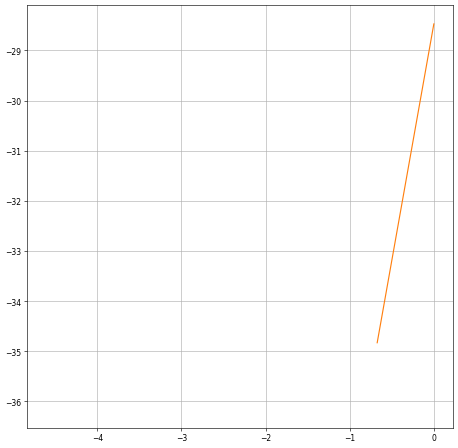

In [36]:
h = np.arange(0.01, 1.0001, 0.0001)
err = []
with open("5knots.txt", 'r') as f:
    for line in f:
        err.append(*[float(x) for x in line.split()])
err = np.array(err)

fig, ax = plt.subplots(figsize=(10, 10), dpi=55)
ax.grid()
#plt.plot(np.log(h), np.log(err))
for i in range(len(h)):
    plt.errorbar(np.log(h[i]), np.log(err[i]))
params = mnk(np.log(h[5000:]), np.log(err[5000:]))
plt.plot(np.log(h[5000:]), np.polyval([params[0], params[1]], np.log(h[5000:])))
print(params[0])